## Regression Plot (MLE)

**Purpose:**  Plot all regression lines on a single plot for **MLE calculations**

Author: Saurish Srivastava @ [Subjectivity Lab](https://subjectivity.sites.northeastern.edu/)

In [1]:
# install packages
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

from itertools import combinations

sns.set_context("talk")
sns.set_style('darkgrid')

In [2]:
def plotRegression(dataList, labelList, domainsList):
    """
    For list {dataList}, list {labelList} and list of lists {domainsList}: make a singular plot with
    all regression lines plotted.
    Shows: Regression plot. 
    """
    
    # adjust the domain input
    allDomains = [[domain + '_mratio_log' for domain in domains] for domains in domainsList]
    for domain in allDomains:
        domain.insert(0, 'Subject')
        
    fig = plt.subplots(figsize=(12, 12))
    ax = plt.gca()
    for i, dataName in enumerate(dataList):
        
        # read in data
        data = pd.read_csv("../../exports/metrics_" + dataName + '.csv', usecols=allDomains[i])
        
        # get data in order by subject
        data = data.sort_values(by=['Subject']).reset_index(drop=True)

        # convert subjects to the index
        data = data.set_index(['Subject'])
    
        # in the event that there are infinite values, replace with NaNs
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        data = data.reset_index(drop=True)
    
        # drop rows w/ NaNs if there are not at least 2 domains
        data = data.dropna(subset=list(data.columns), thresh=abs(1-data.shape[1]))
    
        colors = ['#ff0000bf', '#ff00aabf', '#aa00ffbf', '#0000ffbf', '#00aaffbf',
                  '#00ffaabf', '#00ff00bf', '#aaff00bf', '#ffaa00bf']
        
#       different color palettes
#         colors = ['#df209f', '#9f20df', '#2020df','#209fdf','#20df9f', '#20df20',
#                   '#9fdf20', '#df9f20', '#df2020']
    
#         colors = ['#c33', '#c93', '#9c3', '#3c3', '#3c9', '#39c', '#33c', '#93c', '#c39']
        
        # for z, combo in enumerate(combinations(list(data.columns), 2)):
        #     if z == (len(list(combinations(list(data.columns), 2)))-1):
        #         sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax, label=labelList[i],
        #                     scatter_kws={"color": colors[i], "alpha": 0.125}, line_kws={"color": colors[i],
        #                                                                                 "alpha": 0.80})
        #     else:
        #         sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax,
        #                     scatter_kws={"color": colors[i], "alpha": 0.125}, line_kws={"color": colors[i],
        #                                                                                 "alpha": 0.80})
        for z, combo in enumerate(combinations(list(data.columns), 2)):
            if z == 0:
                if z == (len(list(combinations(list(data.columns), 2)))-1):
                    sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax, 
                                scatter_kws={"color": colors[i], "alpha": 0.125, "edgecolor":"none"}, line_kws={"color": colors[i],
                                                                                            "alpha": 0.6,"label":labelList[i]})
                else:
                    sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax,
                                scatter_kws={"color": colors[i], "alpha": 0.125, "edgecolor":"none"}, line_kws={"color": colors[i],
                                                                                            "alpha": 0.6,"label":labelList[i]})
            else:
                if z == (len(list(combinations(list(data.columns), 2)))-1):
                    sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax, 
                                scatter_kws={"color": colors[i], "alpha": 0.125, "edgecolor":"none"}, line_kws={"color": colors[i],
                                                                                            "alpha": 0.6})
                else:
                    sns.regplot(x=combo[0], y=combo[1], data=data, fit_reg=True, ci=None, ax=ax,
                                scatter_kws={"color": colors[i], "alpha": 0.125, "edgecolor":"none"}, line_kws={"color": colors[i],
                                                                                            "alpha": 0.6})
    ax.set_ylabel('M-ratio Domain 1', fontweight="semibold", fontsize = 25) # Y label
    ax.set_xlabel('M-ratio Domain 2', fontweight="semibold", fontsize = 25) # X label
    
    # adjust x-axis ticks
    plt.xticks(np.arange(-6,3.25,1), np.arange(-6,3.25,1))
    
    # get rid of decimals
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.legend(ncol=2, fontsize=18) # show legend
    
    # save fig into png/svg
    # plt.savefig('figure1.png', format='png', dpi=1200)
    # plt.savefig('figure1.pdf', format='pdf', dpi=1200)
    # plt.savefig("figure1.svg", format="svg", transparent=False)
    plt.show()

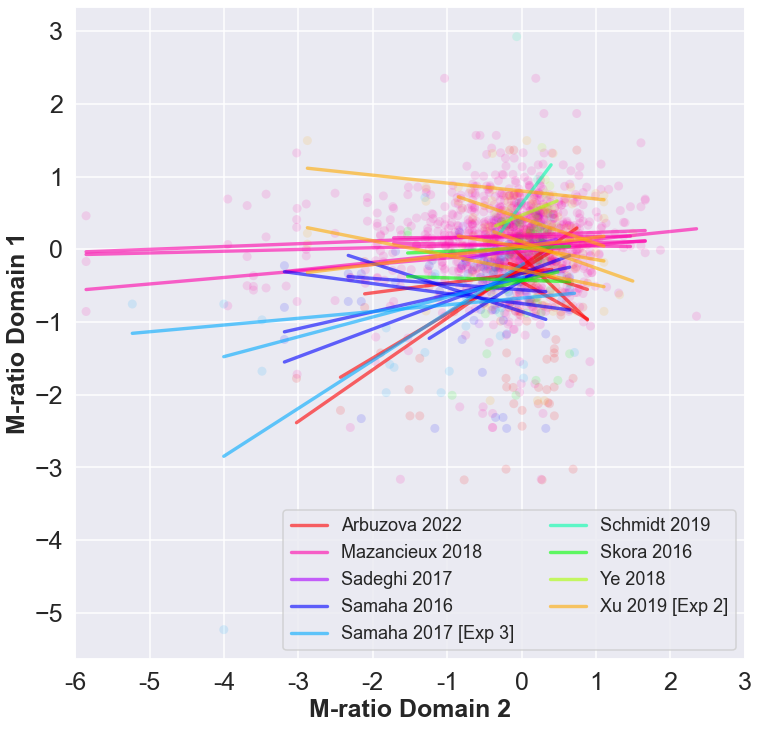

In [3]:
plotRegression(dataList=['Arbuzova_unpub_3', 'Mazancieux_2018', 'Sadeghi_2017', 'Samaha_2016', 'Samaha_2017_exp3',
                   'Schmidt_2019', 'Skora_2016', 'Ye_2018', 'Xu_2019_Exp2'],
           labelList=['Arbuzova 2022', 'Mazancieux 2018', 'Sadeghi 2017', 'Samaha 2016', 'Samaha 2017 [Exp 3]',
                     'Schmidt 2019', 'Skora 2016', 'Ye 2018', 'Xu 2019 [Exp 2]'],
        domainsList=[['memory', 'visual', 'visuomotor', 'motor'], ['VP', 'EF', 'SM', 'EM'], ['memory', 'perception'],
                ['percept_low', 'percept_high', 'wm_low', 'wm_high'], ['oriperc', 'contrast', 'oriwm'],
                ['memory', 'perception'], ['FM', 'IM', 'WM'], ['perception', 'memory'],
                ['N_low', 'N_high', 'C_low', 'C_high']])